Accuracy :  98.55 %


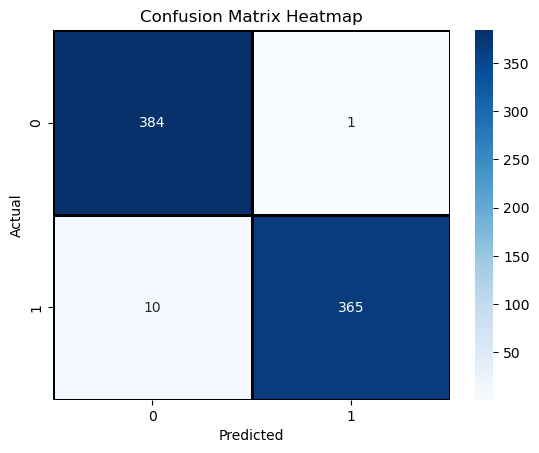

Cross-Val Mean Score : 98.49868073878628


In [2]:
import pandas as pd
import numpy as np
import re
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('Emaildataset.csv')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['email'] = df['email'].apply(clean_text)

x = df[['email']]
y = df['category'].map({'not-spam': 0, 'spam': 1})

preprocess = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(stop_words="english", max_features=5000), 'email')
    ]
)

pipe = Pipeline([
    ('step', preprocess),
    ('model', SVC(kernel="rbf"))
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

pipe.fit(x_train, y_train)

pred = pipe.predict(x_test)

print('Accuracy : ', np.round(accuracy_score(y_test, pred) * 100, 2), '%')

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

scores = cross_val_score(pipe, x, y, cv=10)
print('Cross-Val Mean Score :', scores.mean() * 100)

In [ ]:
import joblib
joblib.dump(pipe,'spam-detector.pkl')

model=joblib.load('spam-detector.pkl')
data={
    'email':'free free free'
}
prediction=model.predict(pd.DataFrame([data]))[0]
if prediction == 0:
    print('Not Spam Message')
else:
    print('SPAM Message')

SPAM Message
